##   线性判别式分析LDA
LDA  针对线性可分的监督学习问题

###     用LDA进行监督学习降维
基本思想： 设法将样例投影到一条直线上，使得同类样例的投影点尽可能接近、异类样例的投影点尽可能远离；对新来的点，投影到同样的这条直线上。

####  LDA数学形式
令分类的超平面的表达式为: `$y= w^T*x$` <br> 
得到优化的目标为 $J=\frac{||\omega^T*\mu_0 - \omega^T\mu_1||_2^2}{\omega^T\sum_0\omega + \omega^T\sum_1\omega}
                = \frac{\omega^TS_b\omega}{\omega^TS_\omega\omega}$ <br>
其中， "类内散度矩阵" $S_\omega=\sum_0+\sum_1=\sum_{x \in X_0}(x-\mu_0)*(x-\mu_0)^T + \sum_{x \in X_1}(x-\mu_1)*(x-\mu_1)^T$ <br>
      "类间散度矩阵" $S_b = (\mu_0-\mu_1)(\mu_0-\mu_1)^T$ <br>
推广到多分类任务，优化函数为 $max\frac{tr(W^T*S_b*W)}{tr(W^T*S_\omega*W)}$ <br>
通过如下广义特征求解： $S_b*W = \lambda*S_\omega*W$   <br> 
W的闭式解则是 $S_\omega^{-1}*S_b$ 的d` 个最大非零广义特征值所对应的特征向量组成的矩阵。<br>



In [ ]:
# LDA的例子
from sklearn  import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt


2


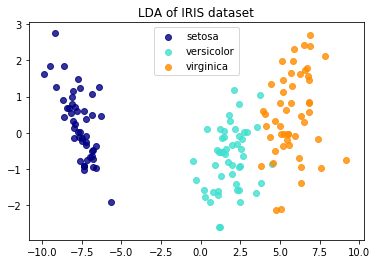

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
print(lda.n_components)
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(X_r2[y==i, 0], X_r2[y==i, 1], alpha=0.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()
    